# MLP with TensorFlow and Keras

### Hardware Check

In [10]:
def get_hardware_info(use_in_notebook=True, install_packages=True):
    import platform
    system_name = platform.system()
    
    if install_packages:
        if system_name.lower() == "windows":
            %pip install psutil    # or: conda install psutil
            %pip install gputil
            %pip install py-cpuinfo
        elif system_name.lower() == "linux":
            !pip install psutil    # or: conda install psutil
            !pip install gputil
            !pip install py-cpuinfo

    # import needed packages
    import psutil
    import GPUtil
    from cpuinfo import get_cpu_info

    if use_in_notebook:
        if install_packages:
            if system_name.lower() == "windows":
                %pip install ipython
            elif system_name.lower() == "linux":
                !pip install ipython

        from IPython.display import clear_output
        clear_output()

    print("-"*32, "\nYour Hardware:\n")

    # General
    print("    ---> General <---")
    print("Operatingsystem:", platform.system())
    print("Version:", platform.version())
    print("Architecture:", platform.architecture())
    print("Processor:", platform.processor())

    # GPU-Information
    print("\n    ---> GPU <---")
    gpus = GPUtil.getGPUs()
    for gpu in gpus:
        print("GPU Name:", gpu.name)
        print("VRAM Total:", gpu.memoryTotal, "MB")
        print("VRAM Used:", gpu.memoryUsed, "MB")
        print("Utilization:", gpu.load * 100, "%")

    # CPU-Information
    print("\n    ---> CPU <---")
    cpu_info = get_cpu_info()
    print("CPU-Name:", cpu_info["brand_raw"])
    print("CPU Kernels:", psutil.cpu_count(logical=False))
    print("Logical CPU-Kernels:", psutil.cpu_count(logical=True))
    print("CPU-Frequence:", psutil.cpu_freq().max, "MHz")
    print("CPU-Utilization:", psutil.cpu_percent(interval=1), "%")

    # RAM-Information
    print("\n    ---> RAM <---")
    ram = psutil.virtual_memory()
    print("RAM Total:", ram.total // (1024**3), "GB")
    print("RAM Available:", ram.available // (1024**3), "GB")
    print("RAM-Utilization:", ram.percent, "%")

    print(f"\n{'-'*32}")


get_hardware_info()

-------------------------------- 
Your Hardware:

    ---> General <---
Operatingsystem: Linux
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Architecture: ('64bit', 'ELF')
Processor: x86_64

    ---> GPU <---
GPU Name: Tesla T4
VRAM Total: 15360.0 MB
VRAM Used: 134.0 MB
Utilization: 0.0 %

    ---> CPU <---
CPU-Name: Intel(R) Xeon(R) CPU @ 2.00GHz
CPU Kernels: 1
Logical CPU-Kernels: 2
CPU-Frequence: 0.0 MHz
CPU-Utilization: 3.0 %

    ---> RAM <---
RAM Total: 12 GB
RAM Available: 10 GB
RAM-Utilization: 18.6 %

--------------------------------


### Data Loading

Using the CIFAR-10 Dataset. An image dataset with 10 classes with 60.000 images with size: 32 x 32 pixel. Each pixel can have a value between 0-255 for r, g amd b channel.

In [11]:
import numpy as np
from tensorflow.keras import datasets, utils

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10
MAX_PIXEL_VALUE = 255.0

# scaling between 0 - 1, and adjust dtype for scaling
X_train = X_train.astype("float32")/MAX_PIXEL_VALUE
X_test = X_test.astype("float32")/MAX_PIXEL_VALUE

# one-hot-encoding of target/labels to categories
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)


X_train[54, 12, 13, 1]

0.36862746

### Build AI Model -> Sequential Model (not recommended)

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build AI Model -> functional API

In [13]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)    # flatten input to a vector
x = layers.Dense(units=200, activation='relu')(x)
# also possible: x = layers.Activation('relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

In [14]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Every unit also includes one bias which adds/outputs another value which is adjustable/learnable, to learn more complex functions -> simplified it can be thought as the b in: f(x)=c*x+b. So the input of a unit is the units before + 1 bias.

For example:
- (3072 + 1) * 200 = 614600
- (10 + 1) * 150 = 1510

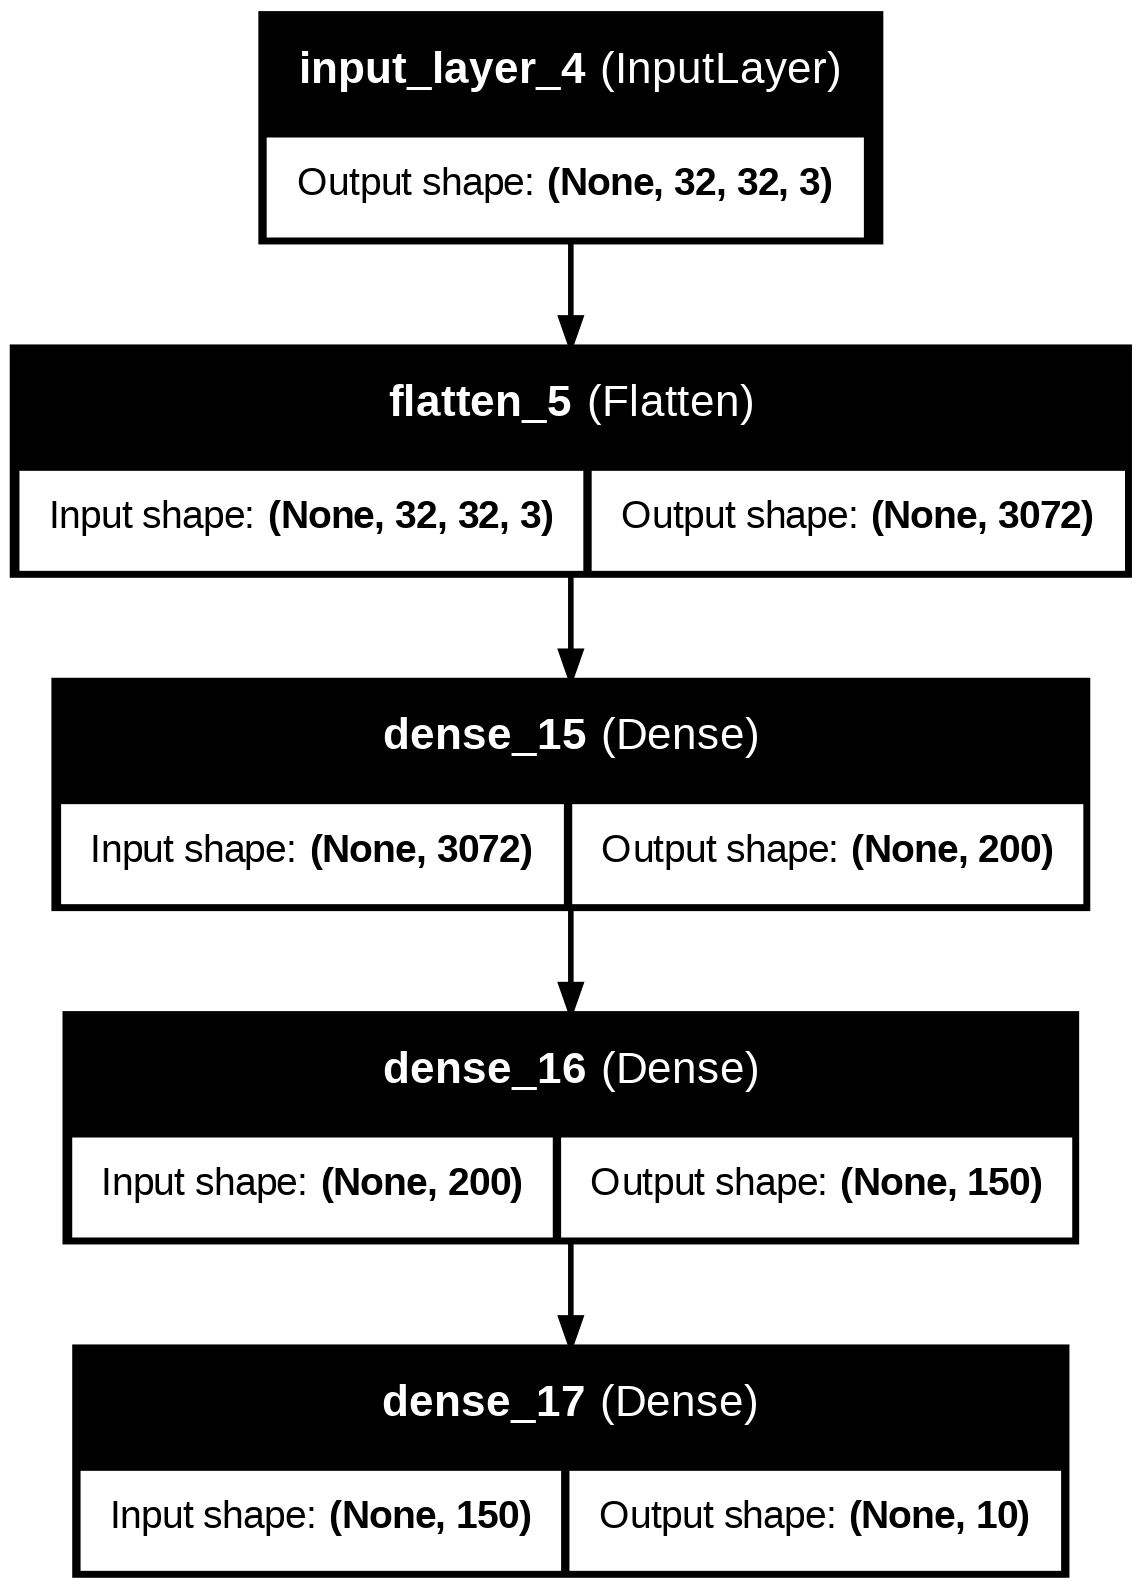

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### Train the Model

- compile/create the model with an optimizer (learning-startegy) and a loss function
- train the model

In [16]:
from tensorflow.keras import optimizers

# 5e-4 = 5 * 10^-4
optimizer = optimizers.Adam(learning_rate=5e-4)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=['accuracy']
)

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2858 - loss: 1.9695
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3990 - loss: 1.6861
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4316 - loss: 1.5933
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4507 - loss: 1.5471
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4666 - loss: 1.4966
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4840 - loss: 1.4547
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4883 - loss: 1.4281
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5024 - loss: 1.4041
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5114 - loss: 1.3793
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5130 - loss: 1.3601


In [18]:
get_hardware_info(install_packages=False)

-------------------------------- 
Your Hardware:

    ---> General <---
Operatingsystem: Linux
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Architecture: ('64bit', 'ELF')
Processor: x86_64

    ---> GPU <---
GPU Name: Tesla T4
VRAM Total: 15360.0 MB
VRAM Used: 1170.0 MB
Utilization: 0.0 %

    ---> CPU <---
CPU-Name: Intel(R) Xeon(R) CPU @ 2.00GHz
CPU Kernels: 1
Logical CPU-Kernels: 2
CPU-Frequence: 0.0 MHz
CPU-Utilization: 17.0 %

    ---> RAM <---
RAM Total: 12 GB
RAM Available: 10 GB
RAM-Utilization: 19.6 %

--------------------------------


### Evaluation

The evaluation function gives a list of metrics. First it outputs the loss then (in this case) the accuracy.

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4952 - loss: 1.4388


[1.4450222253799438, 0.49129998683929443]

### Inferencing the Model (Predicting)

In [29]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

predictions = model.predict(X_test)
ground_truth = CLASSES[np.argmax(y_test, axis=-1)]
print("Predictions as probabilities: ", predictions)
print("\nPredictions as most probably: ", np.argmax(predictions, axis=-1))
print("\nPredictions as most probably class: ", CLASSES[np.argmax(predictions, axis=-1)])
predictions = CLASSES[np.argmax(predictions, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions as probabilities:  [[3.2204017e-02 3.4839522e-02 1.3117290e-01 ... 1.4825172e-02
  6.7494199e-02 1.0914791e-02]
 [3.6513008e-02 1.9695826e-01 1.3455110e-04 ... 3.8704173e-05
  2.2474191e-01 5.4151773e-01]
 [3.3973926e-01 1.1728627e-01 5.9382250e-03 ... 3.1751869e-03
  2.9072875e-01 2.4227439e-01]
 ...
 [7.8715076e-04 4.0288473e-04 1.9297104e-01 ... 2.0556796e-01
  1.5682660e-02 1.7516704e-03]
 [4.5341223e-02 2.4278106e-02 2.8942034e-01 ... 6.0042314e-02
  1.7743140e-02 1.9081505e-02]
 [2.7502544e-02 2.8569649e-03 8.7264262e-02 ... 5.5425608e-01
  5.2355560e-03 4.6182591e-03]]

Predictions as most probably:  [5 9 0 ... 3 2 7]

Predictions as most probably class:  ['dog' 'truck' 'airplane' ... 'cat' 'bird' 'horse']


In [28]:
# passing an nparray uses the elements as single index each -> so the previous code works
CLASSES[np.array([0, 1, 2, 3])]

array(['airplane', 'automobile', 'bird', 'cat'], dtype='<U10')

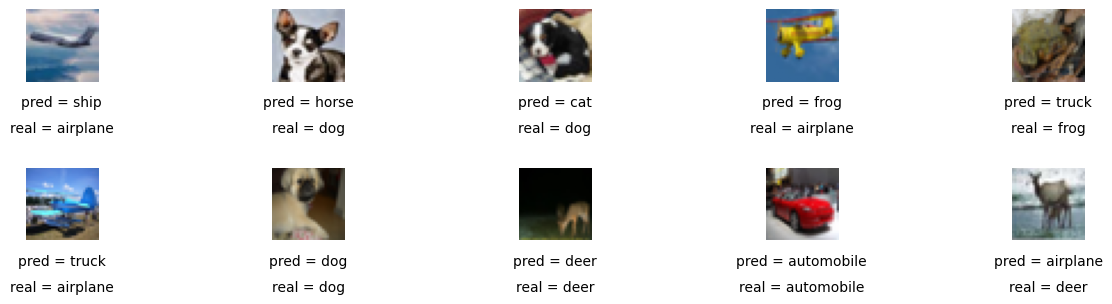

In [37]:
import matplotlib.pyplot as plt

images_to_show = 10
image_idxs = np.random.choice(range(len(X_test)), images_to_show)

rows = 2
cols = images_to_show // rows + (images_to_show % rows > 0)

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 3))
fig.subplots_adjust(hspace=1.2, wspace=0.4)
ax = ax.ravel()    # ax.flatten()

for i, cur_idx in enumerate(image_idxs):
    cur_image = X_test[cur_idx]
    ax[i].axis('off')
    ax[i].text(0.5, -0.35, f"pred = {predictions[cur_idx]}", fontsize=10, ha='center', transform=ax[i].transAxes)
    ax[i].text(0.5, -0.7, f"real = {ground_truth[cur_idx]}", fontsize=10, ha='center', transform=ax[i].transAxes)
    ax[i].imshow(cur_image)

plt.show();